# Automated Keyword Extraction using NLTK

In [1]:
import pandas as pd

In [2]:
file = pd.read_csv('papers.csv')
file.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [4]:
file['word_count'] = file['title'].apply(lambda x: len(str(x).split(" ")))
file[['title','word_count']].head()

,title,word_count
0,Self-Organization of Associative Database and ...,7
1,A Mean Field Theory of Layer IV of Visual Cort...,17
2,Storing Covariance by the Associative Long-Ter...,15
3,Bayesian Query Construction for Neural Network...,7
4,"Neural Network Ensembles, Cross Validation, an...",8


In [6]:
freq = pd.Series(' '.join(file['title']).split()).value_counts()[:20]
freq

for         2036
of          1819
Learning    1417
and         1284
in          1054
with         970
the          733
A            715
Neural       565
to           529
Networks     520
a            445
Models       397
Model        327
Bayesian     286
from         262
Using        260
on           249
by           240
Network      230
dtype: int64

In [7]:
freq1 =  pd.Series(' '.join(file['title']).split()).value_counts()[-20:]
freq1

doesn't                1
LSA                    1
Bigram                 1
normative              1
depression             1
Psychiatry:            1
Multi-resolution       1
Change-point           1
Confidence-Weighted    1
now                    1
Descriptive            1
helps,                 1
Now                    1
cortex:                1
prefrontal             1
Goal-directed          1
rankings               1
Metagraph              1
Diffeomorphic          1
Analysis/Synthesis     1
dtype: int64

In [13]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print('Word :',word)
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

Word : inversely
stemming: invers
lemmatization: inversely


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [36]:
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [17]:
corpus = []
for i in range(0, 3847):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', file['title'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [19]:
len(corpus)
corpus[250]

'curvature information fast stochastic search'

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [22]:
list(cv.vocabulary_.keys())[:10]

['self',
 'organization',
 'associative',
 'database',
 'application',
 'self organization',
 'organization associative',
 'organization associative database',
 'mean',
 'field']

[Text(0, 0, 'learning'),
 Text(1, 0, 'model'),
 Text(2, 0, 'network'),
 Text(3, 0, 'neural'),
 Text(4, 0, 'algorithm'),
 Text(5, 0, 'kernel'),
 Text(6, 0, 'bayesian'),
 Text(7, 0, 'based'),
 Text(8, 0, 'analysis'),
 Text(9, 0, 'data'),
 Text(10, 0, 'process'),
 Text(11, 0, 'classification'),
 Text(12, 0, 'image'),
 Text(13, 0, 'gaussian'),
 Text(14, 0, 'inference'),
 Text(15, 0, 'dynamic'),
 Text(16, 0, 'multi'),
 Text(17, 0, 'sparse'),
 Text(18, 0, 'recognition'),
 Text(19, 0, 'feature')]

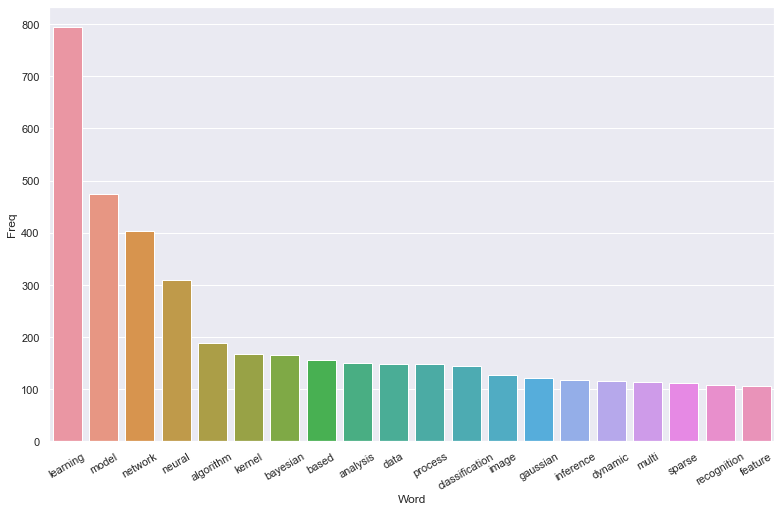

In [24]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0           neural network   195
1   reinforcement learning    86
2         gaussian process    80
3           support vector    57
4           vector machine    43
5          semi supervised    40
6       component analysis    35
7          graphical model    32
8          active learning    29
9      supervised learning    29
10          spiking neuron    29
11      speech recognition    27
12        high dimensional    26
13             monte carlo    24
14             analog vlsi    24
15               real time    22
16            markov model    22
17          bayesian model    22
18      belief propagation    22
19            random field    22


[Text(0, 0, 'neural network'),
 Text(1, 0, 'reinforcement learning'),
 Text(2, 0, 'gaussian process'),
 Text(3, 0, 'support vector'),
 Text(4, 0, 'vector machine'),
 Text(5, 0, 'semi supervised'),
 Text(6, 0, 'component analysis'),
 Text(7, 0, 'graphical model'),
 Text(8, 0, 'active learning'),
 Text(9, 0, 'supervised learning'),
 Text(10, 0, 'spiking neuron'),
 Text(11, 0, 'speech recognition'),
 Text(12, 0, 'high dimensional'),
 Text(13, 0, 'monte carlo'),
 Text(14, 0, 'analog vlsi'),
 Text(15, 0, 'real time'),
 Text(16, 0, 'markov model'),
 Text(17, 0, 'bayesian model'),
 Text(18, 0, 'belief propagation'),
 Text(19, 0, 'random field')]

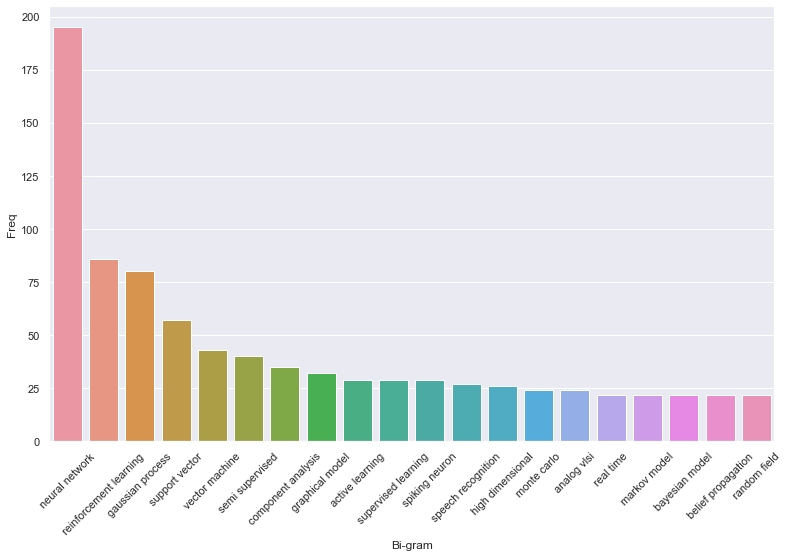

In [26]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                          Tri-gram  Freq
0           support vector machine    37
1         semi supervised learning    22
2         recurrent neural network    16
3   independent component analysis    16
4              hidden markov model    16
5      gaussian process regression    15
6          markov decision process    13
7            radial basis function    11
8            latent variable model    10
9     principal component analysis    10
10          spike timing dependent    10
11     latent dirichlet allocation    10
12        multiple kernel learning    10
13            neural network model     9
14             multi task learning     9
15     timing dependent plasticity     9
16        conditional random field     9
17             markov random field     9
18             vlsi neural network     8
19        dynamic bayesian network     8


[Text(0, 0, 'support vector machine'),
 Text(1, 0, 'semi supervised learning'),
 Text(2, 0, 'recurrent neural network'),
 Text(3, 0, 'independent component analysis'),
 Text(4, 0, 'hidden markov model'),
 Text(5, 0, 'gaussian process regression'),
 Text(6, 0, 'markov decision process'),
 Text(7, 0, 'radial basis function'),
 Text(8, 0, 'latent variable model'),
 Text(9, 0, 'principal component analysis'),
 Text(10, 0, 'spike timing dependent'),
 Text(11, 0, 'latent dirichlet allocation'),
 Text(12, 0, 'multiple kernel learning'),
 Text(13, 0, 'neural network model'),
 Text(14, 0, 'multi task learning'),
 Text(15, 0, 'timing dependent plasticity'),
 Text(16, 0, 'conditional random field'),
 Text(17, 0, 'markov random field'),
 Text(18, 0, 'vlsi neural network'),
 Text(19, 0, 'dynamic bayesian network')]

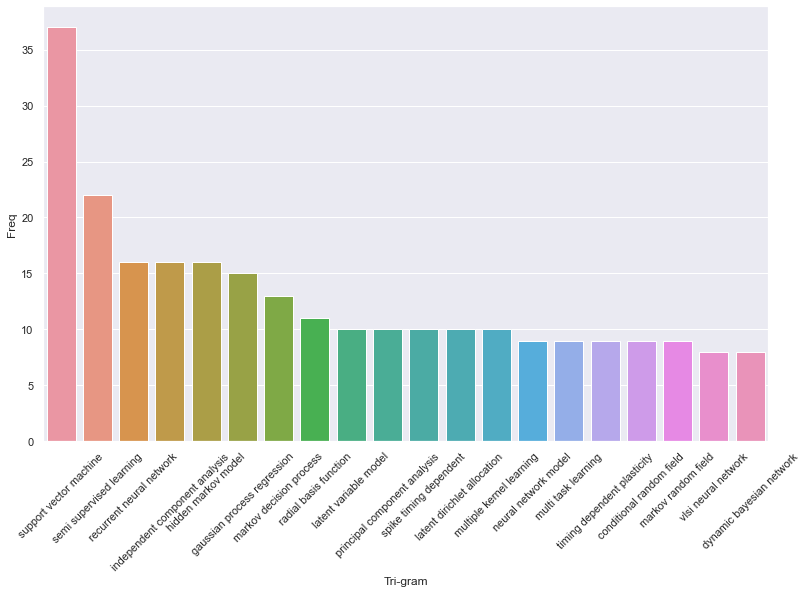

In [27]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
 

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[251]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [34]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords and TF-IDF Score:")
for k in keywords:
    print(k,keywords[k])


Abstract:
efficient nonlinear control actor tutor architecture

Keywords and TF-IDF Score:
nonlinear control actor 0.482
nonlinear control 0.482
actor 0.412
architecture 0.34
nonlinear 0.308
